# Problem Set 1: Analysis of racial disparities in felony sentencing

# 0. Load packages and imports

In [203]:
## basic functionality
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## can add others if you need them

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [204]:
df = pd.read_csv("sentencing_asof0405.csv")

/var/folders/xc/0mc4v93x1sl61jqqdrj91f7c0000gn/T/ipykernel_81331/2103473006.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sentencing_asof0405.csv")


## 0.2: Print head, dimensions, info (0 points)

In [205]:
df.head()
df.shape
df.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [206]:
columns = ["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]

for col in columns:
    count = df[col].nunique()
    print(f"Unique values in {col}: {count}")

Unique values in CASE_ID: 197519
Unique values in CASE_PARTICIPANT_ID: 211977
Unique values in CHARGE_ID: 229015


There may be more unique people than unique cases because certain cases/crimes involve multiple people/perpetrators. We find these cases with multiple participants below:

In [207]:
participant_per_case_count = df.groupby('CASE_ID')['CASE_PARTICIPANT_ID'].nunique()
multiple_participant_cases = participant_per_case_count[participant_per_case_count > 1]
multiple_participant_cases # all these cases have multiple case participants

CASE_ID
166402790922    2
176098576921    2
176270837451    2
180953886081    2
181880245351    4
               ..
442924851235    2
443338247136    2
443405066012    2
443440604843    2
443593921120    2
Name: CASE_PARTICIPANT_ID, Length: 12288, dtype: int64

There may be more unique charges than unique people because a given person can have multiple charges. We find these people below:

In [208]:
charges_per_participant_count = df.groupby('CASE_PARTICIPANT_ID')['CHARGE_ID'].nunique()
multiple_charges = charges_per_participant_count[charges_per_participant_count > 1]
multiple_charges # all these case participants have multiple charges

CASE_PARTICIPANT_ID
97581722610     4
97603050731     2
102758793737    2
113431347854    8
117303251208    6
               ..
901692945079    2
901899525864    3
904336027784    2
904972002160    2
905015885242    2
Name: CHARGE_ID, Length: 14547, dtype: int64

In [209]:
df.groupby('CASE_ID')['CHARGE_ID'].nunique().agg(["mean", "median"])
df.groupby('CASE_PARTICIPANT_ID')['CHARGE_ID'].nunique().agg(["mean", "median"])

mean      1.159458
median    1.000000
Name: CHARGE_ID, dtype: float64

mean      1.126146
median    1.000000
Name: CHARGE_ID, dtype: float64

In [210]:
df.groupby('CASE_ID')['CASE_PARTICIPANT_ID'].nunique().agg(["mean", "median"])

mean      1.073198
median    1.000000
Name: CASE_PARTICIPANT_ID, dtype: float64

The data does not seem to allow us to follow participants across different cases. This is because the participant_ID is specific to the case. Below I show that there are no case participant ids with multiple cases associated to it.

In [211]:
cases_per_participant_count = df.groupby('CASE_PARTICIPANT_ID')['CASE_ID'].nunique()
multiple_cases = cases_per_participant_count[cases_per_participant_count > 1]
multiple_cases

Series([], Name: CASE_ID, dtype: int64)

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


OFFENSE_CATEGORY is the offense category assigned before the charges are filed on a case, while UPDATED_OFFENSE_CATEGORY is based off the primary charge. These two can differ as the case evolves over time.

In [212]:
df['is_changed_offense'] = df['OFFENSE_CATEGORY'] != df['UPDATED_OFFENSE_CATEGORY']
offense_counts = df[df['is_changed_offense']]['OFFENSE_CATEGORY'].value_counts()
sorted_counts = offense_counts.sort_values(ascending=False)


print("These are the most commonly changed offenses:")
print(sorted_counts.head(10))

These are the most commonly changed offenses:
OFFENSE_CATEGORY
PROMIS Conversion               6394
DUI                             3896
UUW - Unlawful Use of Weapon    2155
Other Offense                   2125
Aggravated Battery              1927
Burglary                        1513
Attempt Homicide                1174
Theft                           1025
Domestic Battery                 793
Aggravated DUI                   748
Name: count, dtype: int64


In [213]:
## One Example
DUI = sorted_counts.index[1]
example_changed_offense = df[(df['OFFENSE_CATEGORY'] == DUI) & df['is_changed_offense']].iloc[1]

print("The original offense changed from " + example_changed_offense.OFFENSE_CATEGORY + " to " + example_changed_offense.UPDATED_OFFENSE_CATEGORY)


The original offense changed from DUI to Aggravated DUI


The charged offense changed from a DUI to an Aggravated DUI. This suggests that once a defendant was processed, more information regarding their DUI history or paperwork were brought to light as reasons prompting the status of Aggravated DUI include driving with an expired license or having multiple DUIs within a certain time period.

## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [214]:
# Remove aggravated
df['simplified_offense_derived'] = df['UPDATED_OFFENSE_CATEGORY'].str.replace("Aggravated", "")

cats = ["Arson", "Homicide", "Vehicle-related", "Battery"]

conditions = [df['UPDATED_OFFENSE_CATEGORY'].str.contains("Arson", case = False),
              df['UPDATED_OFFENSE_CATEGORY'].str.contains("Homicide", case = False),
              df['UPDATED_OFFENSE_CATEGORY'].str.contains("Vehicle|Vehicular", case = False),
              df['UPDATED_OFFENSE_CATEGORY'].str.contains("Battery", case = False)]

df['simplified_offense_derived'] = np.select(conditions, cats, default = df['simplified_offense_derived'])

df['simplified_offense_derived'].unique()

array(['Homicide', 'PROMIS Conversion', 'Narcotics', 'Retail Theft',
       'Other Offense', 'UUW - Unlawful Use of Weapon', 'Battery',
       'Burglary', 'Sex Crimes', ' Fleeing and Eluding', ' DUI',
       'Home Invasion', 'Attempt Armed Robbery', 'Arson', 'Theft',
       'Driving With Suspended Or Revoked License', 'Identity Theft',
       'Forgery', 'DUI', 'Robbery', 'Vehicle-related', 'Fraudulent ID',
       'Criminal Damage to Property', 'Armed Robbery',
       'Escape - Failure to Return', 'Fraud',
       'Failure to Register as a Sex Offender', ' Discharge Firearm',
       'Credit Card Cases', 'Kidnapping', 'Residential Burglary',
       'Deceptive Practice', 'Violation Order Of Protection',
       ' Identity Theft', 'Perjury', ' Robbery',
       'Possession of Contraband in Penal Institution', 'Bribery',
       'Dog Fighting', 'Intimidation', 'Stalking', 'Pandering',
       'Impersonating Police Officer', 'Child Abduction',
       'Disarming Police Officer', 'Violate Bail Bond

In [215]:
print(f"Difference is: {df['UPDATED_OFFENSE_CATEGORY'].nunique() - df['simplified_offense_derived'].nunique()}")

Difference is: 11


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [216]:
# Check race variable names
df['RACE'].unique()

array(['Black', 'White [Hispanic or Latino]', 'White', 'HISPANIC', nan,
       'ASIAN', 'White/Black [Hispanic or Latino]', 'Asian',
       'American Indian', 'Unknown', 'Biracial'], dtype=object)

In [217]:
df['is_black_derived'] = df['RACE'].str.contains('Black')

df['is_hisp_derived'] = (df['RACE'] == 'HISPANIC') | (df['RACE'] == 'White [Hispanic or Latino]')

df['is_white_derived'] = df['RACE'] == 'White'

df['is_othereth_derived'] = ~(df['is_black_derived'] | df['is_hisp_derived'] | df['is_white_derived'])

In [218]:
df['is_male_derived'] = df['GENDER'] == 'Male'

In [219]:
df['AGE_AT_INCIDENT'].max() # check age max
percentile_99 = df['AGE_AT_INCIDENT'].quantile(0.9999)
percentile_99
df['age_derived'] = np.where(df['AGE_AT_INCIDENT'] > percentile_99, percentile_99, df['AGE_AT_INCIDENT'])
df['age_derived'].max() # new max

137.0

81.0

81.0

In [220]:
df['SENTENCE_DATE'] = df['SENTENCE_DATE'].str.replace("220", "200")
df['SENTENCE_DATE'] = df['SENTENCE_DATE'].str.replace("210", "200")
df['SENTENCE_DATE'] = df['SENTENCE_DATE'].str.replace("290", "200")
df['SENTENCE_DATE'] = df['SENTENCE_DATE'].str.replace("291", "201")
df['SENTENCE_DATE'] = df['SENTENCE_DATE'].str.replace("211", "201")


df['sentenceymd_derived'] = pd.to_datetime(df['SENTENCE_DATE'])
df[df['sentenceymd_derived'].dt.year > 2021]['SENTENCE_DATE']

df['sentenceym_derived'] = df['sentenceymd_derived'].dt.to_period('M').dt.to_timestamp()
df['sentenceym_derived']

/var/folders/xc/0mc4v93x1sl61jqqdrj91f7c0000gn/T/ipykernel_81331/2217463218.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sentenceymd_derived'] = pd.to_datetime(df['SENTENCE_DATE'])


2436       4/26/2022 12:00:00 AM
53545      6/26/2212 12:00:00 AM
53546      6/26/2212 12:00:00 AM
53547      6/26/2212 12:00:00 AM
70529      4/22/2041 12:00:00 AM
92468      5/11/2051 12:00:00 AM
92469      5/11/2051 12:00:00 AM
92470      5/11/2051 12:00:00 AM
92471      5/11/2051 12:00:00 AM
113202     6/24/2026 12:00:00 AM
164201      3/4/2048 12:00:00 AM
167067      6/8/2026 12:00:00 AM
172426      4/4/2216 12:00:00 AM
173833     5/17/2026 12:00:00 AM
173922     2/18/2026 12:00:00 AM
174044     10/3/2026 12:00:00 AM
177942     4/14/2026 12:00:00 AM
202234     7/21/2217 12:00:00 AM
211851    11/26/2218 12:00:00 AM
226318     1/29/2029 12:00:00 AM
231390    10/26/2218 12:00:00 AM
236602      7/8/2219 12:00:00 AM
237934     6/27/2219 12:00:00 AM
238876    11/25/2219 12:00:00 AM
240217    12/31/2025 12:00:00 AM
240218    12/31/2025 12:00:00 AM
240822     1/12/2023 12:00:00 AM
Name: SENTENCE_DATE, dtype: object

0        1986-06-01
1        1986-06-01
2        1986-06-01
3        1986-06-01
4        2014-10-01
            ...    
248141   2021-03-01
248142   2021-03-01
248143   2021-03-01
248144   2021-03-01
248145   2021-03-01
Name: sentenceym_derived, Length: 248146, dtype: datetime64[ns]

In [221]:
#Identify the different versions of Doug and Shelley's names
mask = df['SENTENCE_JUDGE'].notna()
filtered_df = df[mask]

filtered_df[filtered_df['SENTENCE_JUDGE'].str.contains("Doug")]['SENTENCE_JUDGE']
filtered_df[filtered_df['SENTENCE_JUDGE'].str.contains("Shelley")]['SENTENCE_JUDGE']

1115          Doug  Simpson
1621      Douglas J Simpson
1651          Doug  Simpson
1693          Doug  Simpson
4169      Douglas J Simpson
                ...        
76045     Douglas J Simpson
76963     Douglas J Simpson
76964     Douglas J Simpson
78023     Douglas J Simpson
116866    Douglas J Simpson
Name: SENTENCE_JUDGE, Length: 107, dtype: object

131              Shelley  Sutker
142       Shelley  Sutker-Dermer
236       Shelley  Sutker-Dermer
258       Shelley  Sutker-Dermer
442       Shelley  Sutker-Dermer
                   ...          
247790    Shelley  Sutker-Dermer
247801    Shelley  Sutker-Dermer
247804    Shelley  Sutker-Dermer
247818    Shelley  Sutker-Dermer
248069    Shelley  Sutker-Dermer
Name: SENTENCE_JUDGE, Length: 2508, dtype: object

In [222]:
df['SENTENCE_JUDGE'] = df['SENTENCE_JUDGE'].str.replace("Doug Simpson", "Douglas J Simpson")
df['SENTENCE_JUDGE'] = df['SENTENCE_JUDGE'].str.replace("Shelley Sutker", "Shelley Sutker-Dermer")

df['SENTENCE_JUDGE'] = df['SENTENCE_JUDGE'].astype(str)
df['judgeid_derived'] = df['SENTENCE_JUDGE'].astype('category').cat.codes
df['judgeid_derived'] = 'judge_' + df['judgeid_derived'].astype(str)

print(df[['judgeid_derived', 'SENTENCE_JUDGE']].head(50))

   judgeid_derived          SENTENCE_JUDGE
0        judge_140           John  Mannion
1        judge_140           John  Mannion
2        judge_140           John  Mannion
3        judge_140           John  Mannion
4         judge_40       Clayton Jay Crane
5        judge_140           John  Mannion
6         judge_40       Clayton Jay Crane
7        judge_140           John  Mannion
8        judge_140           John  Mannion
9         judge_40       Clayton Jay Crane
10       judge_140           John  Mannion
11       judge_114          James L Rhodes
12       judge_312         Thomas V Gainer
13       judge_114          James L Rhodes
14       judge_312         Thomas V Gainer
15       judge_114          James L Rhodes
16       judge_312         Thomas V Gainer
17       judge_312         Thomas V Gainer
18       judge_163            Kay M Hanlon
19       judge_333        William J Kunkle
20        judge_84           Evelyn B Clay
21        judge_84           Evelyn B Clay
22        j

In [223]:
df.sample(10)[['RACE', 'is_black_derived', 'is_hisp_derived', 'is_white_derived', 'is_othereth_derived', 'GENDER', 'is_male_derived', 'AGE_AT_INCIDENT', 'age_derived', 'SENTENCE_DATE', 'sentenceymd_derived', 'sentenceym_derived', 'SENTENCE_JUDGE', 'judgeid_derived']]

,RACE,is_black_derived,is_hisp_derived,is_white_derived,is_othereth_derived,GENDER,is_male_derived,AGE_AT_INCIDENT,age_derived,SENTENCE_DATE,sentenceymd_derived,sentenceym_derived,SENTENCE_JUDGE,judgeid_derived
228767,White [Hispanic or Latino],False,True,False,False,Male,True,26.0,26.0,6/20/2019 12:00:00 AM,2019-06-20,2019-06-01,Kerry M Kennedy,judge_167
192148,Black,True,False,False,False,Male,True,23.0,23.0,4/3/2017 12:00:00 AM,2017-04-03,2017-04-01,Steven G Watkins,judge_288
199404,White,False,False,True,False,Male,True,42.0,42.0,3/9/2017 12:00:00 AM,2017-03-09,2017-03-01,Thomas V Gainer,judge_312
179378,Black,True,False,False,False,Male,True,18.0,18.0,9/7/2016 12:00:00 AM,2016-09-07,2016-09-01,Diane Gordon Cannon,judge_61
154229,Black,True,False,False,False,Male,True,NaN,NaN,7/27/2018 12:00:00 AM,2018-07-27,2018-07-01,Ramon Ocasio,judge_254
163473,White,False,False,True,False,Male,True,31.0,31.0,11/24/2015 12:00:00 AM,2015-11-24,2015-11-01,William G Lacy,judge_329
215324,Black,True,False,False,False,Male,True,55.0,55.0,8/29/2018 12:00:00 AM,2018-08-29,2018-08-01,Diane Gordon Cannon,judge_61
170050,Black,True,False,False,False,Male,True,37.0,37.0,1/18/2017 12:00:00 AM,2017-01-18,2017-01-01,Kenneth J Wadas,judge_164
46674,Black,True,False,False,False,Male,True,30.0,30.0,7/16/2012 12:00:00 AM,2012-07-16,2012-07-01,Nicholas R Ford,judge_236
100207,Black,True,False,False,False,Female,False,42.0,42.0,10/2/2013 12:00:00 AM,2013-10-02,2013-10-01,Lawrence Edward Flood,judge_179


## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [224]:
participant_per_case = df.groupby('CASE_ID')['CASE_PARTICIPANT_ID'].nunique()
one_participant_cases = participant_per_case[participant_per_case == 1]
df_one_participant_case = df[df['CASE_ID'].isin(one_participant_cases.index)]

In [225]:
df_participant_level = df_one_participant_case[(df['PRIMARY_CHARGE_FLAG'] == True) & (df['CURRENT_SENTENCE_FLAG'] == True)]

#Check:
df_participant_level.groupby('CASE_PARTICIPANT_ID')['CHARGE_ID'].nunique().mean() 

/var/folders/xc/0mc4v93x1sl61jqqdrj91f7c0000gn/T/ipykernel_81331/2728563404.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_participant_level = df_one_participant_case[(df['PRIMARY_CHARGE_FLAG'] == True) & (df['CURRENT_SENTENCE_FLAG'] == True)]


1.0

In [226]:
df_judge_cleaned = df_participant_level[df_participant_level['SENTENCE_JUDGE'].notna()]
df_judge_cleaned = df_judge_cleaned[df_judge_cleaned['SENTENCE_JUDGE'] != 'FLOOD']

In [227]:
start = pd.Timestamp("2012-01-01")
end = pd.Timestamp("2021-05-04")

df_subset = df_judge_cleaned[(df_judge_cleaned['sentenceymd_derived'] >= start) & (df_judge_cleaned['sentenceymd_derived'] <= end)]
print(f"Number of rows:") 
print(len(df_subset))

Number of rows:
135600


# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [228]:
df1 = pd.read_pickle("sentencing_cleaned.pkl")
len(df1)

135165

## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

In [229]:
denominator = df1.groupby('sentenceym_derived')['CASE_ID'].nunique()

black_count = df1[df1['is_black_derived'] == True].groupby('sentenceym_derived')['CASE_ID'].nunique()
black_prop = black_count/denominator

white_count = df1[df1['is_white_derived'] == True].groupby('sentenceym_derived')['CASE_ID'].nunique()
white_prop = white_count/denominator

table_prop = pd.DataFrame({
    'Month': white_prop.index,
    'Black Proportion': black_prop.values,
    'White Proportion': white_prop.values
})

table_prop

,Month,Black Proportion,White Proportion
0,2012-01-01,0.677419,0.144564
1,2012-02-01,0.648966,0.160690
2,2012-03-01,0.638958,0.158189
3,2012-04-01,0.696379,0.146936
4,2012-05-01,0.695146,0.144337
...,...,...,...
106,2020-11-01,0.606925,0.154786
107,2020-12-01,0.646182,0.158287
108,2021-01-01,0.621924,0.111857
109,2021-02-01,0.651731,0.134420


<Figure size 2000x1000 with 0 Axes>

Text(0.5, 0, 'Month and Year')

Text(0, 0.5, 'Proportion of Defendants')

Text(0.5, 1.0, 'Proportion of Black and White Defendants Over Time')

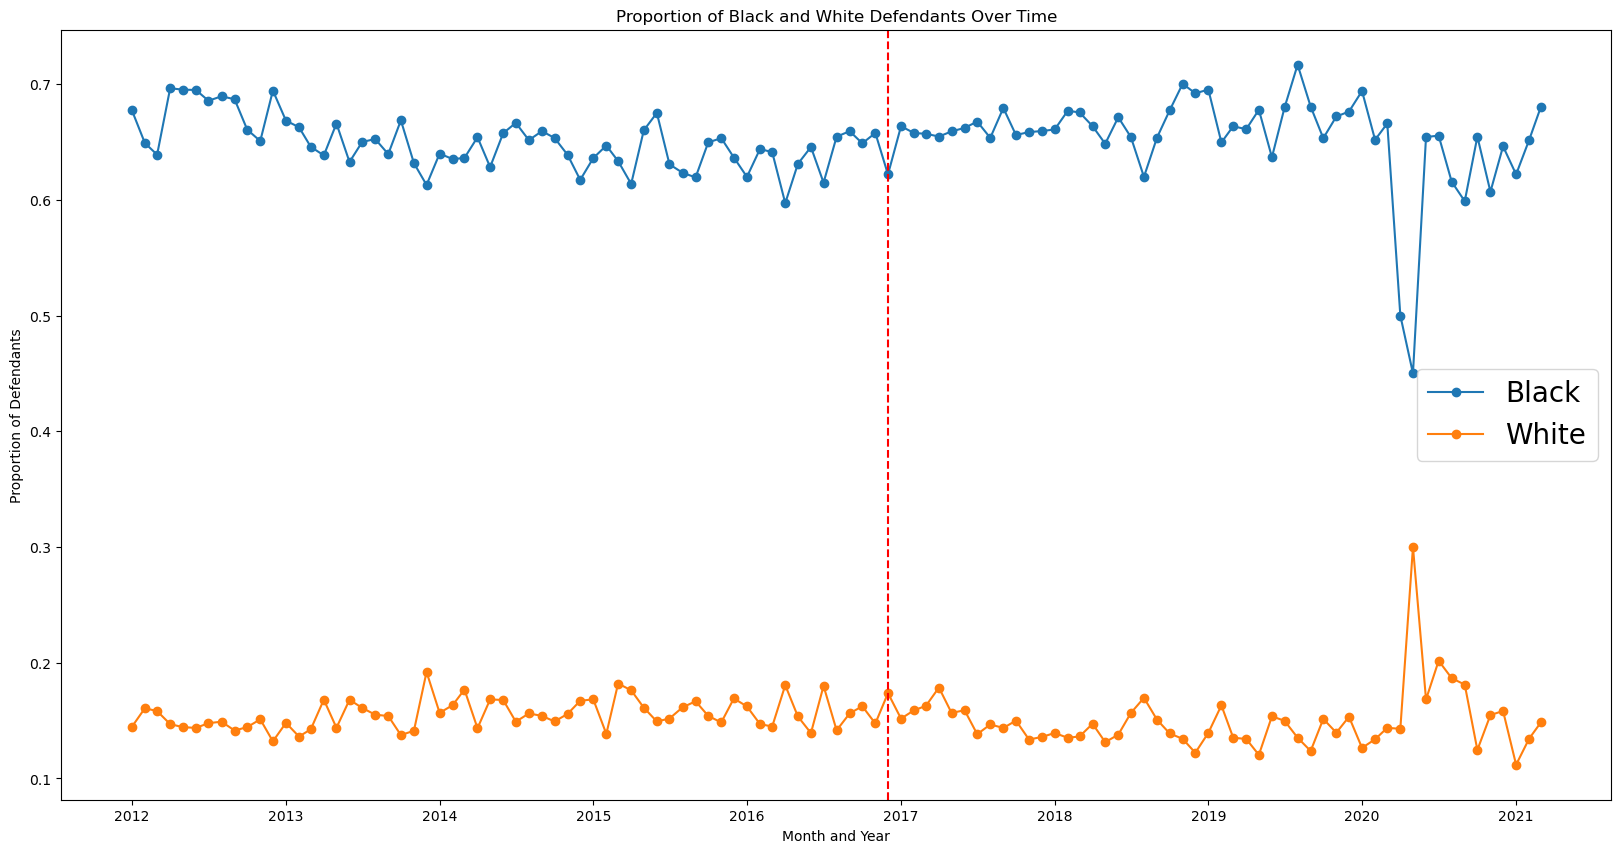

In [230]:
plt.figure(figsize = (20,10))

plt.plot(table_prop["Month"], table_prop["Black Proportion"], label = "Black", marker = 'o')
plt.plot(table_prop["Month"], table_prop["White Proportion"], label = "White",  marker = 'o')

plt.legend(fontsize = 20)

plt.xlabel('Month and Year')
plt.ylabel('Proportion of Defendants')
plt.axvline(pd.Timestamp('2016-12-01'), color= 'r', linestyle='--', label='DA Foxx Takes Office')
plt.title('Proportion of Black and White Defendants Over Time')

The proportion of Black defendants out of all defendants sentenced in a given month/year is represented by the expression:
$$
\frac{\sum_{i=1}^{n} B_i}{N}
$$
where \( B_i \) denotes the count of Black defendants in case \( i \), \( n \) is the total number of unique cases in the month/year, and \( N \) is the total number of defendants sentenced in that month/year. Similarly, the proportion of White defendants can be expressed as:
$$
\frac{\sum_{i=1}^{n} W_i}{N}
$$
where \( W_i \) represents the count of White defendants in case \( i \).

The proportion of black defendants is much higher than the proportion of white ones. In April-May 2020, we notice a dramatic and brief drop in Black proportion and a smaller rise in White proportion of defenders. This coincides with the George Floyd protests, and could be explained by a greater hesitancy among police officers to patrol majority Black neighborhoods during this time. This can also reflect changes in law enforcement practices, judicial priorities, or societal dynamics during the early stages of the COVID-19 pandemic and associated lockdown measures.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

In [231]:
incarcerated_df = df1[df1['COMMITMENT_TYPE'] == "Illinois Department of Corrections"]

black_inc_count = incarcerated_df[df1['is_black_derived']].groupby('sentenceym_derived')['CASE_ID'].nunique()
black_inc_prop = black_inc_count/black_count


white_inc_count = incarcerated_df[df1['is_white_derived']].groupby('sentenceym_derived')['CASE_ID'].nunique()
white_inc_prop = white_inc_count/white_count


diff = black_inc_prop - white_inc_prop

table_diff = pd.DataFrame({
    'Month': white_prop.index,
    'Black Proportion': black_inc_prop.values,
    'White Proportion': white_inc_prop.values,
    'Difference': diff
})
table_diff

/var/folders/xc/0mc4v93x1sl61jqqdrj91f7c0000gn/T/ipykernel_81331/1993286668.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  black_inc_count = incarcerated_df[df1['is_black_derived']].groupby('sentenceym_derived')['CASE_ID'].nunique()
/var/folders/xc/0mc4v93x1sl61jqqdrj91f7c0000gn/T/ipykernel_81331/1993286668.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  white_inc_count = incarcerated_df[df1['is_white_derived']].groupby('sentenceym_derived')['CASE_ID'].nunique()


,Month,Black Proportion,White Proportion,Difference
sentenceym_derived,,,,
2012-01-01,2012-01-01,0.594356,0.359504,0.234852
2012-02-01,2012-02-01,0.601488,0.373391,0.228097
2012-03-01,2012-03-01,0.584466,0.443137,0.141329
2012-04-01,2012-04-01,0.598000,0.445498,0.152502
2012-05-01,2012-05-01,0.539106,0.327354,0.211752
...,...,...,...,...
2020-11-01,2020-11-01,0.409396,0.302632,0.106764
2020-12-01,2020-12-01,0.489914,0.376471,0.113443
2021-01-01,2021-01-01,0.496403,0.440000,0.056403


<Figure size 1200x700 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Difference'>

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Difference'>

Text(0.5, 0, 'Month and Year')

Text(0, 0.5, 'Difference between Black and White Incarceration Rates')

Text(0.5, 1.0, 'Difference between Black and White Incarceration Rates Over Time')

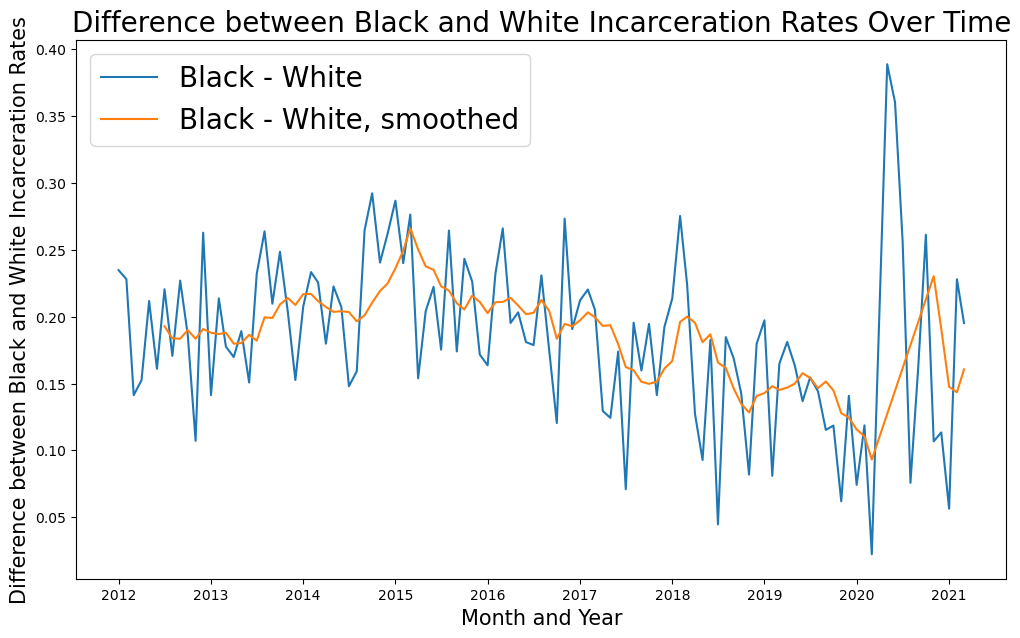

In [232]:
plt.figure(figsize = (12,7))

sns.lineplot(data=table_diff, x="Month", y="Difference", label = "Black - White")
sns.lineplot(data=table_diff, x="Month", y=table_diff['Difference'].rolling(7).mean(), label='Black - White, smoothed')


plt.legend(fontsize = 20)

plt.xlabel('Month and Year', fontsize = 15)
plt.ylabel('Difference between Black and White Incarceration Rates', fontsize = 15)
plt.title('Difference between Black and White Incarceration Rates Over Time', fontsize = 20)

Despite large fluctuations, the gap in black and white incarcerations rates was hovering around 0.2 percentage points until around 2017, when trends took a downward turn. By the beginning of 2020, the gap had shrunk to around 0.1 percentage points, but perhaps due to the George Floyd Protests, rose again throughout 2020. The gap appears to be declining again, but was around 0.15 percentage points in 2021. 

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [233]:
frequent_black_offenses = df1[df1['is_black_derived']]['simplified_offense_derived'].value_counts().head(10).index.tolist()
frequent_white_offenses = df1[df1['is_white_derived']]['simplified_offense_derived'].value_counts().head(10).index.tolist()

frequent_offenses = set(frequent_black_offenses).union(frequent_white_offenses)
print("The most frequent offenses are:")
print(frequent_offenses)

The most frequent offenses are:
{'Narcotics', 'Robbery', 'Residential Burglary', 'Driving With Suspended Or Revoked License', 'Burglary', 'Retail Theft', 'Battery', 'Theft', 'Vehicle-related', 'UUW - Unlawful Use of Weapon', 'Other Offense', 'DUI'}


### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [234]:
df_frequent_offenses = df1[df1['simplified_offense_derived'].isin(frequent_offenses)]
df_frequent_sample = df_frequent_offenses[(df_frequent_offenses['is_black_derived'])|(df_frequent_offenses['is_white_derived'])]

black_frequent_count = df_frequent_sample[df_frequent_sample['is_black_derived']].groupby('simplified_offense_derived')['CASE_ID'].nunique()
white_frequent_count = df_frequent_sample[df_frequent_sample['is_white_derived']].groupby('simplified_offense_derived')['CASE_ID'].nunique()

black_frequent_inc = df_frequent_sample[(df_frequent_sample['is_black_derived']) & (df_frequent_sample['COMMITMENT_TYPE'] == 'Illinois Department of Corrections')].groupby('simplified_offense_derived')['CASE_ID'].nunique()
white_frequent_inc = df_frequent_sample[(df_frequent_sample['is_white_derived']) & (df_frequent_sample['COMMITMENT_TYPE'] == 'Illinois Department of Corrections')].groupby('simplified_offense_derived')['CASE_ID'].nunique()

black_frequent_prop = black_frequent_inc/black_frequent_count
white_frequent_prop = white_frequent_inc/white_frequent_count

disparity = black_frequent_prop - white_frequent_prop

table_inc = pd.DataFrame({
    #'Offense': black_frequent_count.index,
    'Black Incarceration Rate': black_frequent_prop.values,
    'White Incarceration Rate': white_frequent_prop.values,
    'Disparity': disparity
})
table_inc.sort_values(by='Disparity', ascending=False, inplace=True)
table_inc


,Black Incarceration Rate,White Incarceration Rate,Disparity
simplified_offense_derived,,,
Narcotics,0.537876,0.242535,0.295341
Battery,0.509032,0.275552,0.233480
UUW - Unlawful Use of Weapon,0.696191,0.481973,0.214217
Retail Theft,0.595713,0.449582,0.146132
Burglary,0.661927,0.535763,0.126164
Other Offense,0.340580,0.230228,0.110351
Driving With Suspended Or Revoked License,0.582193,0.496552,0.085642
Theft,0.386961,0.318721,0.068240
Residential Burglary,0.717791,0.654114,0.063677


Narcotics have the largest disparities in incarceration rates. This makes sense given the discourse about the racialized nature of the war on drugs. The next largest disparity in incarceration rate is in battery - which also makes sense given racialized perceptions of Black people (especially Black men) as aggressive or violent. 

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


In [235]:
df_retail = df1[df1["simplified_offense_derived"] == 'Retail Theft']
df_retail['incarcerated'] = (df_retail['COMMITMENT_TYPE'] == 'Illinois Department of Corrections') == True

/var/folders/xc/0mc4v93x1sl61jqqdrj91f7c0000gn/T/ipykernel_81331/748883662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['incarcerated'] = (df_retail['COMMITMENT_TYPE'] == 'Illinois Department of Corrections') == True


In [236]:
def calculate_disp(start_date, end_date):
    data = df_retail[(df_retail['sentenceym_derived'] >= start_date) & (df_retail['sentenceym_derived'] <= end_date) & (df_retail['simplified_offense_derived'] == "Retail Theft")]
    rate = data.groupby('is_black_derived')['incarcerated'].mean()
    
    try:
        disparity = rate[True] - rate[False]
    except:
        disparity = 0
    return disparity

In [237]:
def calculate_disparity_with_se(start_date, end_date):
    subset = df_retail[(df_retail['sentenceym_derived'] >= start_date) & (df_retail['sentenceym_derived'] <= end_date) & (df_retail['simplified_offense_derived'] == "Retail Theft")]
    rates = subset.groupby('is_black_derived')['incarcerated'].mean()
    n = len(subset)
    
    try:
        disparity = rates[True] - rates[False]
        se = (disparity * (1 - disparity) / n) ** 0.5
    except:
        disparity, se = 0, 0
    
    return disparity, se

In [238]:
bandwidths = {
    "2 months": (["2016-10-01", "2016-11-30"], ["2017-01-01", "2017-02-28"]),
    "4 months": (["2016-08-01", "2016-11-30"], ["2017-01-01", "2017-04-30"]),
    "8 months": (["2016-04-01", "2016-11-30"], ["2017-01-01", "2017-08-31"]),
    "12 months": (["2016-01-01", "2016-11-30"], ["2017-01-01", "2017-12-31"])
}

data = {}

for bandwidth, (pre, post) in bandwidths.items():
    pre_disparity, pre_se = calculate_disparity_with_se(pre[0], pre[1])
    post_disparity, post_se = calculate_disparity_with_se(post[0], post[1])
    
    data[bandwidth] = {
        "pre": pre_disparity, "post": post_disparity, 
        "pre_se": pre_se, "post_se": post_se
    }

df_data = pd.DataFrame(data).T
df_data

,pre,post,pre_se,post_se
2 months,0.120491,0.114608,0.019922,0.018869
4 months,0.120415,0.068023,0.013444,0.011990
8 months,0.161407,0.035618,0.010969,0.006970
12 months,0.197445,0.053087,0.010227,0.007668


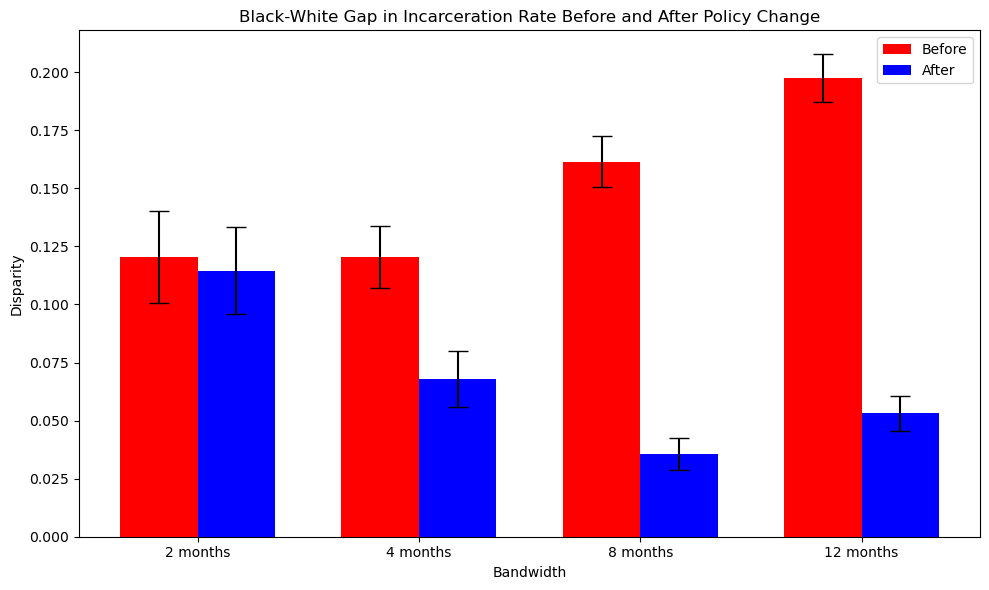

In [239]:
bar_width = 0.35
index = range(len(df_data))

fig, ax = plt.subplots(figsize=(10,6))

pre_bar = ax.bar(index, df_data['pre'], bar_width, yerr=df_data['pre_se'], capsize=7, label='Before', color='red')
post_bar = ax.bar([i+bar_width for i in index], df_data['post'], bar_width, yerr=df_data['post_se'], capsize=7, 
                  label='After', color='blue')

ax.set_xlabel('Bandwidth')
ax.set_ylabel('Disparity')
ax.set_title('Black-White Gap in Incarceration Rate Before and After Policy Change')
ax.set_xticks([i+bar_width/2 for i in index])
ax.set_xticklabels(df_data.index)
ax.legend()

plt.tight_layout()
plt.show();

### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

The evidence seems to suggest that those who argued that the policy change would reduce disparities were correct, since the disparity narrowed after the policy for all bandwidths. Those who argued that disparities would widen may have based themselves on short term data, as the 2 month bandwidth suggests the that the disparity did not statistically significantly change since the confidence intervals overlap. 